Name :SAMUEL WAIRIUKO

Title:BANK CHURN ANALYSIS AND PREDICTION

DATA CLEANING AND PREPROCESSING

In [138]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
#%matplotlib inline
import seaborn as sns

In [139]:
BANK = pd.read_csv('churn.csv')

In [140]:
BANK.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [141]:
BANK.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [142]:
BANK.shape

(10000, 14)

In [143]:
BANK.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [144]:
BANK.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [145]:
#Check how many duplicates
print(sum(BANK.duplicated()))


0


In [146]:
BANK.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [147]:
BANK.CreditScore.corr(BANK.Exited)
BANK.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


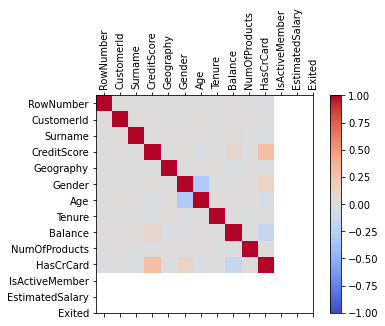

In [148]:
corr = BANK.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(BANK.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(BANK.columns)
ax.set_yticklabels(BANK.columns)
plt.show()

OUTLIER DETECTION

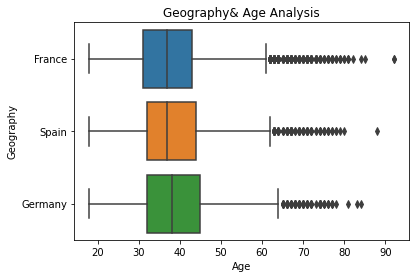

In [149]:
#average age distribution per region.
sns.boxplot(x=BANK.Age, y=BANK.Geography)
plt.title('Geography& Age Analysis')
plt.show()

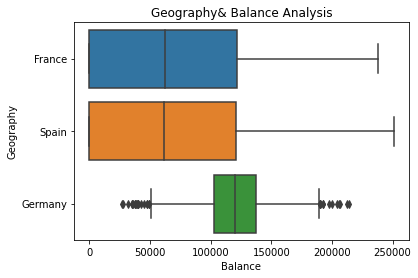

In [150]:
#average Balance distribution per Country.
sns.boxplot(x=BANK.Balance, y=BANK.Geography)
plt.title('Geography& Balance Analysis')
plt.show()

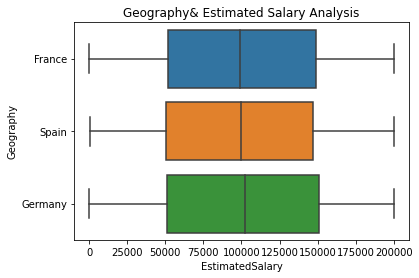

In [152]:
#average EstimatedSalary distribution per region.
sns.boxplot(x=BANK.EstimatedSalary, y=BANK.Geography)
plt.title('Geography& Estimated Salary Analysis')
plt.show()

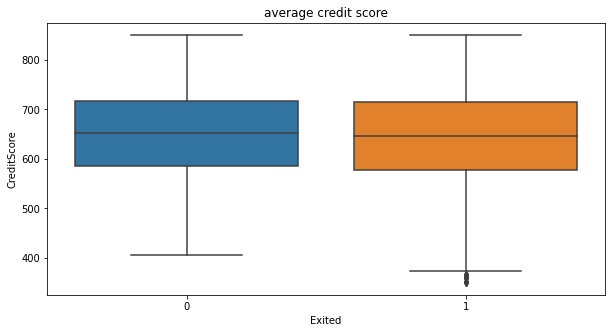

In [153]:
#bad credit score is a factor to churn .outliers as shouwn with exited
plt.figure(figsize=(10,5)) ## setting over-all figure size (optional)
sns.boxplot(data = BANK, y = 'CreditScore', x = 'Exited').set_title('average credit score')
plt.show()

EXPLORATION DATA ANALYSIS

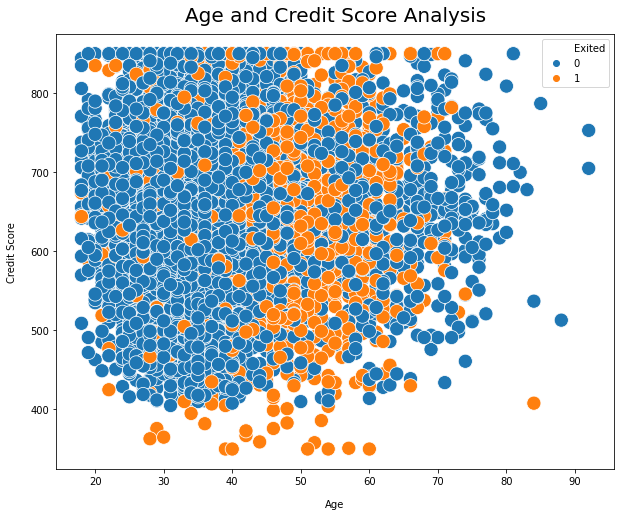

In [154]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y='CreditScore', hue='Exited', data=BANK, s=200)
plt.title("Age and Credit Score Analysis", y=1.015, fontsize=20)
plt.xlabel("Age", labelpad=13)
plt.ylabel("Credit Score", labelpad=13)
ax = plt.gca()

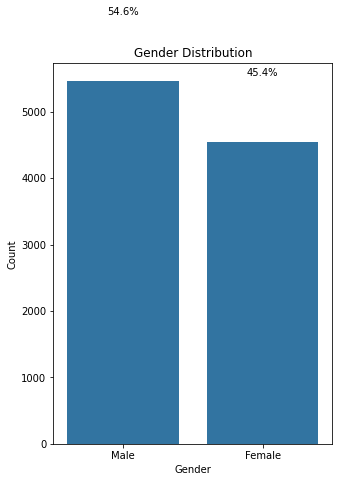

In [155]:
#Finding the Gender distribution

plt.figure(figsize=(5,7))
order1 = BANK['Gender'].value_counts().index
sns.countplot(data = BANK, x = 'Gender', order = order1, color = sns.color_palette()[0])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
order2 = BANK['Gender'].value_counts()

for i in range(order2.shape[0]):
    count = order2[i]
    strt='{:0.1f}%'.format(100*count / BANK.shape[0])
    plt.text(i,count+1000,strt,ha='center')

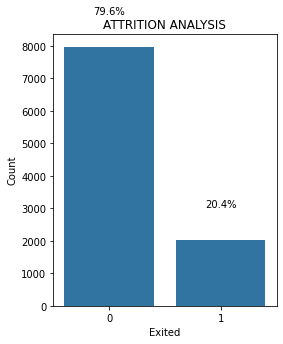

In [156]:

plt.figure(figsize=(4,5))
order1 = BANK['Exited'].value_counts().index
sns.countplot(data = BANK, x = 'Exited', order = order1, color = sns.color_palette()[0])
plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('ATTRITION ANALYSIS')
order2 = BANK['Exited'].value_counts()

for i in range(order2.shape[0]):
    count = order2[i]
    strt='{:0.1f}%'.format(100*count / BANK.shape[0])
    plt.text(i,count+1000,strt,ha='center')

In [157]:
BANK.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Text(0.5, 1.0, 'Gender, Exited & Country')

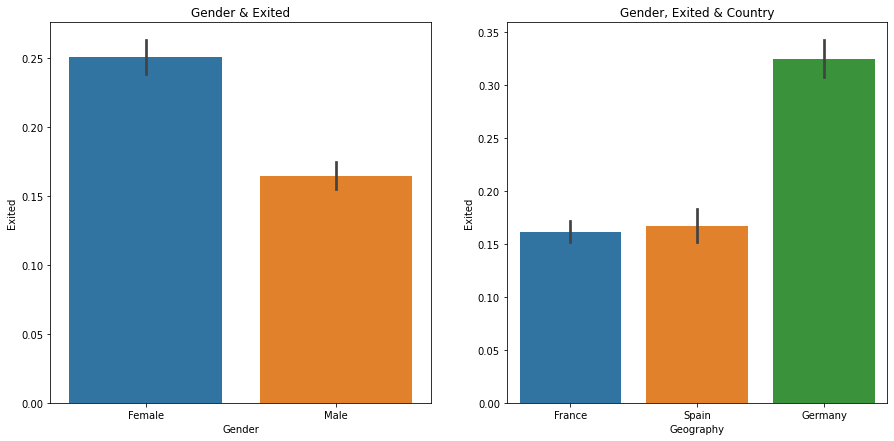

In [158]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,7))
sns.barplot(BANK['Gender'],BANK['Exited'],ax=axis1).set_title('Gender & Exited')
sns.barplot(BANK['Geography'],BANK['Exited'],ax=axis2).set_title('Gender, Exited & Country')



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


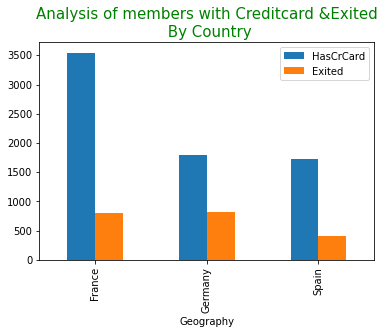

In [159]:
#analysis Geographical wise
#france have got the highest number of customers  followed by Germany and Spain in 3rd position
#more churn in france and least in Spain.
#Germany and Spain have fewer customers with Credit Card as compared to France.
g=BANK.groupby('Geography')[
                                   'HasCrCard',
                                   'Exited'].sum()
g.reset_index(drop=False,inplace=True)
g.columns
g.plot("Geography",[
                                   'HasCrCard',
                                   'Exited'],kind='bar')
plt.title('Analysis of members with Creditcard &Exited\n By Country',
          fontsize = 15, color = 'Green')

plt.show()




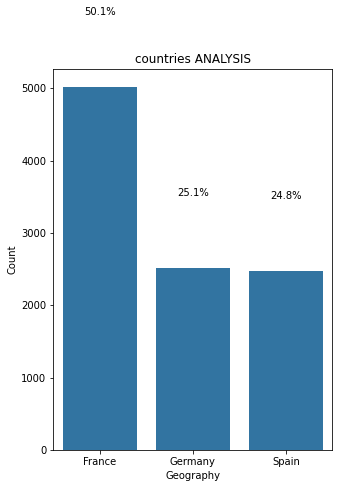

In [160]:

plt.figure(figsize=(5,7))
order1 = BANK['Geography'].value_counts().index
sns.countplot(data = BANK, x = 'Geography', order = order1, color = sns.color_palette()[0])
plt.xlabel('Geography')
plt.ylabel('Count')
plt.title('countries ANALYSIS')
order2 = BANK['Geography'].value_counts()

for i in range(order2.shape[0]):
    count = order2[i]
    strt='{:0.1f}%'.format(100*count / BANK.shape[0])
    plt.text(i,count+1000,strt,ha='center')

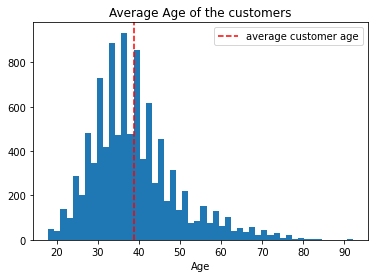

In [161]:
plt.hist(BANK['Age'],bins=50)
plt.title('Average Age of the customers')
plt.axvline(BANK['Age'].mean(),
          label='average customer age',
          color='r',
          linestyle='dashed')
plt.xlabel('Age')
plt.legend()
plt.show()

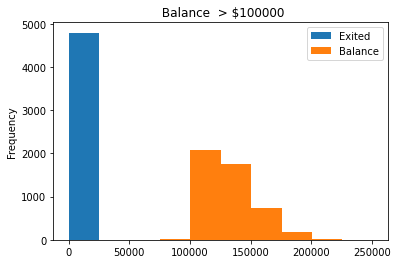

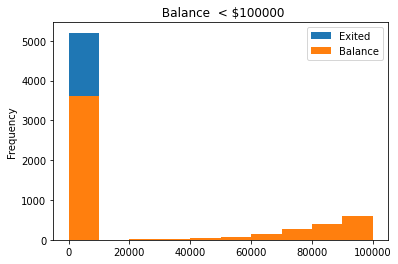

In [162]:

BANK.loc[BANK.Balance >100000,
          [  'Exited', 'Balance']].sort_values(by='Balance',
        ascending = False).plot(kind='hist', title=' Balance  > $100000')
BANK.loc[BANK.Balance <100000,
          [  'Exited', 'Balance']].sort_values(by='Balance',
        ascending = False).plot(kind='hist', title=' Balance  < $100000')


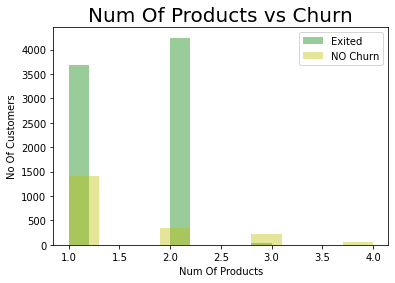

In [163]:
#There exists a strong relationship between the number of products a customer have and the churn rate
#the higher the number  of products the lower the rate of Churn

plt.figure(figsize = (6,4))
plt.hist(BANK.loc[BANK.Exited == 0, 'NumOfProducts'],
         alpha = 0.4,
         color = 'green',
         label='Exited')
plt.hist(BANK.loc[BANK.Exited == 1, 'NumOfProducts'],
         alpha = 0.4,
         color = 'y',
         label='NO Churn')
plt.ylabel("No Of Customers")
plt.xlabel('Num Of Products')
plt.title('Num Of Products vs Churn', fontsize=20)
plt.legend()
plt.show()
plt.show()

In [164]:
BANK.groupby('Geography')['EstimatedSalary'].describe()

,count,mean,std,min,25%,50%,75%,max
Geography,,,,,,,,
France,5014.0,99899.180814,57336.289016,90.07,51399.19,99132.31,149295.36,199929.17
Germany,2509.0,101113.435102,58263.011501,11.58,51016.02,102397.22,151083.80,199970.74
Spain,2477.0,99440.572281,57103.678091,417.41,50267.69,99984.86,147278.43,199992.48


In [165]:
BANK.groupby('Gender')['EstimatedSalary'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,4543.0,100601.541382,57371.034092,91.75,51224.485,101905.34,148963.12,199992.48
Male,5457.0,99664.576931,57628.130354,11.58,50906.650,98060.51,149503.54,199953.33


In [166]:
data=BANK.loc[BANK.Age >91,
          ['Geography','HasCrCard', 'CreditScore', 'Gender', 'Exited', 'Balance']].sort_values(by='CreditScore',
                                                                             ascending = False)

In [167]:
data

,Geography,HasCrCard,CreditScore,Gender,Exited,Balance
6443,France,0,753,Male,0,121513.31
6759,France,1,705,Male,0,126076.24


In [168]:
SCORE=BANK.loc[BANK.CreditScore < 360,
          ['Geography','HasCrCard', 'CreditScore', 'Gender', 'Balance','Exited']].sort_values(by='CreditScore',
                                                                             ascending = False)

In [169]:
SCORE

,Geography,HasCrCard,CreditScore,Gender,Balance,Exited
1405,France,1,359,Female,128747.69,1
1962,Spain,1,358,Female,143542.36,1
2473,Germany,1,351,Female,163146.46,1
1631,Spain,1,350,Male,152677.48,1
1838,Germany,0,350,Male,109733.20,1
8723,France,1,350,Male,0.00,1
8762,France,0,350,Female,0.00,1
9624,France,1,350,Female,111098.85,1


In [170]:
BANK.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [171]:
IMPORTANT_VARIABLES=BANK.drop(['RowNumber', 'CustomerId','Surname'], axis=1)

In [172]:
IMPORTANT_VARIABLES.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [173]:
categorical_columns = [x for x in IMPORTANT_VARIABLES.dtypes.index if IMPORTANT_VARIABLES.dtypes[x]=='object']
categorical_columns = [x for x in categorical_columns
                     if x not in ['Item_Identifier','Outlet_Identifier','source']]
for col in categorical_columns:
    print('\nFrequency of Categories for variable%s'%col)
    print(IMPORTANT_VARIABLES[col].value_counts())


Frequency of Categories for variableGeography
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Frequency of Categories for variableGender
Male      5457
Female    4543
Name: Gender, dtype: int64


In [174]:
#Define a generic function using Pandas replace function
def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded 
print ('\n\nBefore Coding Gender:')
print (pd.value_counts(IMPORTANT_VARIABLES["Gender"]))
IMPORTANT_VARIABLES["Gender_Coded"] = coding(IMPORTANT_VARIABLES["Gender"], {'Female':0,'Male':1})
print ('\nAfter Coding Gender:')
print (pd.value_counts(IMPORTANT_VARIABLES["Gender_Coded"]))



Before Coding Gender:
Male      5457
Female    4543
Name: Gender, dtype: int64

After Coding Gender:
1    5457
0    4543
Name: Gender_Coded, dtype: int64


In [175]:
IMPORTANT_VARIABLES.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Coded
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


In [176]:
DATA1=IMPORTANT_VARIABLES.drop(['Gender'], axis=1)

In [177]:
DATA1.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Coded
0,619,France,42,2,0.00,1,1,1,101348.88,1,0
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1,0
3,699,France,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0,0


In [178]:
Geography_dummies = pd.get_dummies(DATA1.Geography)
encoded_data=pd.concat([DATA1, Geography_dummies], axis=1)

In [179]:
encoded_data

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Coded,France,Germany,Spain
0,619,France,42,2,0.00,1,1,1,101348.88,1,0,1,0,0
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0,0,0,0,1
2,502,France,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0
3,699,France,39,1,0.00,2,0,0,93826.63,0,0,1,0,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,39,5,0.00,2,1,0,96270.64,0,1,1,0,0
9996,516,France,35,10,57369.61,1,1,1,101699.77,0,1,1,0,0
9997,709,France,36,7,0.00,1,0,1,42085.58,1,0,1,0,0
9998,772,Germany,42,3,75075.31,2,1,0,92888.52,1,1,0,1,0


In [180]:
Models=encoded_data.drop(['Geography'], axis=1)

In [181]:
Models

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Coded,France,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,0,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1,0


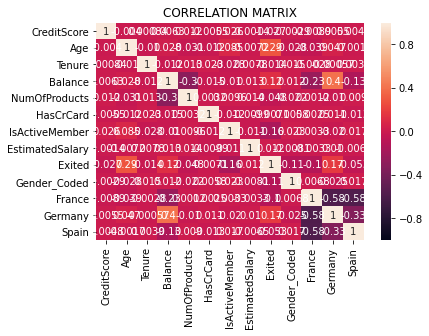

In [182]:
sns.heatmap(Models.corr(),vmin=-1,vmax=1,annot=True)
plt.title('CORRELATION MATRIX')
plt.show()

In [183]:
X =Models .drop('Exited', axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Coded,France,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,1,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,0,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [184]:
y =Models .Exited
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

MODEL BUILDING

In [185]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from scipy.stats.contingency import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
import time
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import classification_report,f1_score, roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [186]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
from sklearn.model_selection import train_test_split

LOGISTIC REGRESSION

In [187]:
X =Models .drop('Exited', axis=1)
y =Models .Exited

In [188]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [189]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [190]:
print_score(log_reg, X_train, y_train, X_test, y_test, train=True)
print_score(log_reg, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 78.37%
_______________________________________________
Classification Report:	Precision Score: 38.04%
			Recall Score: 6.68%
			F1 score: 11.36%
_______________________________________________
Confusion Matrix: 
 [[5389  158]
 [1356   97]]

Test Result:
Accuracy Score: 79.97%
_______________________________________________
Classification Report:	Precision Score: 43.20%
			Recall Score: 9.25%
			F1 score: 15.23%
_______________________________________________
Confusion Matrix: 
 [[2345   71]
 [ 530   54]]



In [191]:
test_score = accuracy_score(y_test, log_reg.predict(X_test)) * 100
train_score = accuracy_score(y_train, log_reg.predict(X_train)) * 100

tuning_results_df = pd.DataFrame(data=[["Tuned Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,78.371429,79.966667


KNEIGHBOURS(KNN)

In [192]:
X =Models .drop('Exited', axis=1)
y =Models .Exited

In [193]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [194]:

print_score(knn_classifier, X_train, y_train, X_test, y_test, train=True)
print_score(knn_classifier, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 81.46%
_______________________________________________
Classification Report:	Precision Score: 64.93%
			Recall Score: 23.19%
			F1 score: 34.18%
_______________________________________________
Confusion Matrix: 
 [[5365  182]
 [1116  337]]

Test Result:
Accuracy Score: 77.07%
_______________________________________________
Classification Report:	Precision Score: 25.47%
			Recall Score: 9.25%
			F1 score: 13.57%
_______________________________________________
Confusion Matrix: 
 [[2258  158]
 [ 530   54]]



In [195]:
test_score = accuracy_score(y_test, knn_classifier.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_classifier.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,78.371429,79.966667
1,Tuned K-nearest neighbors,81.457143,77.066667


RANDOM FOREST

In [196]:
X =Models .drop('Exited', axis=1)
y =Models .Exited

In [197]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rand_forest = RandomForestClassifier(n_estimators=1000, random_state=42)
rand_forest.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [198]:
print_score(rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score(rand_forest, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[5547    0]
 [   0 1453]]

Test Result:
Accuracy Score: 86.87%
_______________________________________________
Classification Report:	Precision Score: 77.14%
			Recall Score: 46.23%
			F1 score: 57.82%
_______________________________________________
Confusion Matrix: 
 [[2336   80]
 [ 314  270]]



In [199]:
test_score = accuracy_score(y_test, rand_forest.predict(X_test)) * 100
train_score = accuracy_score(y_train, rand_forest.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,78.371429,79.966667
1,K-nearest neighbors,81.457143,77.066667
2,Random Forest Classifier,100.000000,86.866667
3,Support Vector Machine,100.000000,80.533333
4,Decision Tree Classifier,100.000000,80.733333
5,Random Forest Classifier,90.885714,86.933333
6,Random Forest Classifier,100.000000,86.866667


SUPPORT VECTOR MACHINE (SVM)

In [200]:
X =Models .drop('Exited', axis=1)
y =Models .Exited

In [201]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [202]:
test_score = accuracy_score(y_test, svm_model.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_model.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,78.371429,79.966667
1,K-nearest neighbors,81.457143,77.066667
2,Random Forest Classifier,100.000000,86.866667
3,Support Vector Machine,100.000000,80.533333
4,Decision Tree Classifier,100.000000,80.733333
5,Random Forest Classifier,90.885714,86.933333
6,Random Forest Classifier,100.000000,86.866667
7,Support Vector Machine,100.000000,80.533333


DECISION TREE

In [203]:
X =Models .drop('Exited', axis=1)
y =Models .Exited

In [204]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [205]:
test_score = accuracy_score(y_test, tree.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,78.371429,79.966667
1,K-nearest neighbors,81.457143,77.066667
2,Random Forest Classifier,100.000000,86.866667
3,Support Vector Machine,100.000000,80.533333
4,Decision Tree Classifier,100.000000,80.733333
5,Random Forest Classifier,90.885714,86.933333
6,Random Forest Classifier,100.000000,86.866667
7,Support Vector Machine,100.000000,80.533333
8,Decision Tree Classifier,100.000000,80.733333


HYPERPARAMETER TUNING

LOGISTIC REGRESSION

In [206]:
X =Models .drop('Exited', axis=1)
y =Models .Exited

In [207]:
from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

log_reg = LogisticRegression()

grid_search_cv = GridSearchCV(log_reg, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5, iid=True)


In [208]:

log_reg = LogisticRegression(C=0.615848211066026, 
                             solver='liblinear')

log_reg.fit(X_train, y_train)

print_score(log_reg, X_train, y_train, X_test, y_test, train=True)
print_score(log_reg, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 78.37%
_______________________________________________
Classification Report:	Precision Score: 38.04%
			Recall Score: 6.68%
			F1 score: 11.36%
_______________________________________________
Confusion Matrix: 
 [[5389  158]
 [1356   97]]

Test Result:
Accuracy Score: 79.97%
_______________________________________________
Classification Report:	Precision Score: 43.20%
			Recall Score: 9.25%
			F1 score: 15.23%
_______________________________________________
Confusion Matrix: 
 [[2345   71]
 [ 530   54]]



In [209]:
test_score = accuracy_score(y_test, log_reg.predict(X_test)) * 100
train_score = accuracy_score(y_train, log_reg.predict(X_train)) * 100

tuning_results_df = pd.DataFrame(data=[["Tuned Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,78.371429,79.966667


HYPERPARAMETER TUNING

KNEIGHBOURS(KNN)

In [210]:
train_score = []
test_score = []
neighbors = range(1, 21)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train)))
    test_score.append(accuracy_score(y_test, model.predict(X_test)))

Maximum KNN score on the test data: 80.23%


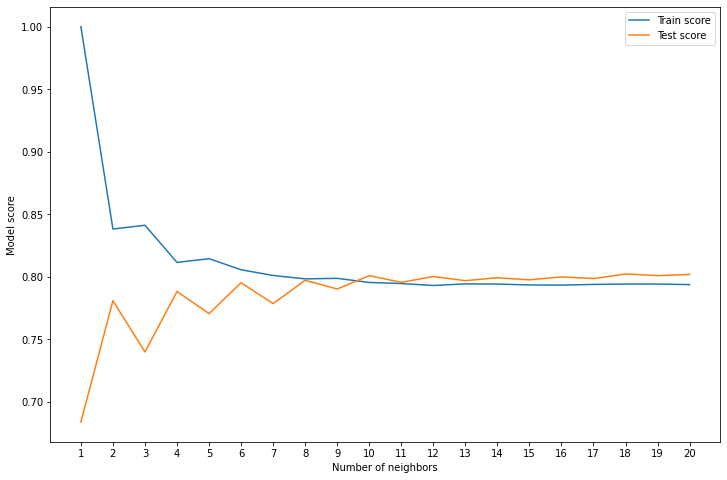

In [211]:
plt.figure(figsize=(12, 8))

plt.plot(neighbors, train_score, label="Train score")
plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_score)*100:.2f}%")

In [212]:
print_score(rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score(rand_forest, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[5547    0]
 [   0 1453]]

Test Result:
Accuracy Score: 86.87%
_______________________________________________
Classification Report:	Precision Score: 77.14%
			Recall Score: 46.23%
			F1 score: 57.82%
_______________________________________________
Confusion Matrix: 
 [[2336   80]
 [ 314  270]]



Text(0.5, 1.0, 'Finding optimal KNN')

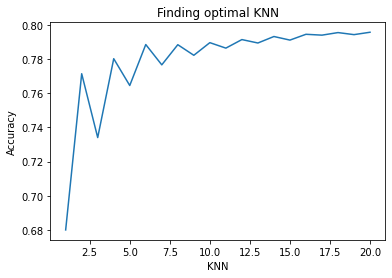

In [213]:
from sklearn.model_selection import cross_val_score
scores = []
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    scores.append(cross_val_score(clf,X,y,cv=4).mean())

import matplotlib.pyplot as plt
plt.plot(range(1,21),scores)
plt.xlabel("KNN")
plt.ylabel("Accuracy")
plt.title("Finding optimal KNN")

In [214]:
test_score = accuracy_score(y_test, knn_classifier.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_classifier.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,78.371429,79.966667
1,Tuned K-nearest neighbors,81.457143,77.066667


HYPERPARAMETER TUNING

SUPPORT VECTOR MACHINE (SVM)

In [215]:
svm_model = SVC(kernel='rbf', gamma=0.1, C=1.0)

params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'poly', 'rbf')}

svm_grid = GridSearchCV(svm_model, params, n_jobs=-1, cv=5, verbose=1, scoring="accuracy")


In [216]:

svm_model = SVC(C=5, gamma=0.01, kernel='rbf')
svm_model.fit(X_train, y_train)

print_score(svm_model, X_train, y_train, X_test, y_test, train=True)
print_score(svm_model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[5547    0]
 [   0 1453]]

Test Result:
Accuracy Score: 80.53%
_______________________________________________
Classification Report:	Precision Score: 0.00%
			Recall Score: 0.00%
			F1 score: 0.00%
_______________________________________________
Confusion Matrix: 
 [[2416    0]
 [ 584    0]]



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [217]:
test_score = accuracy_score(y_test, svm_model.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_model.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,78.371429,79.966667
1,Tuned K-nearest neighbors,81.457143,77.066667
2,Tuned Support Vector Machine,100.000000,80.533333


HYPERPARAMETER TUNING 

DECISION TREE

In [218]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree = DecisionTreeClassifier(random_state=42)
grid_search_cv = GridSearchCV(tree, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3, iid=True)


In [219]:

tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=3,
                              min_samples_leaf=2, 
                              min_samples_split=2, 
                              splitter='random')
tree.fit(X_train, y_train)

print_score(tree, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 81.93%
_______________________________________________
Classification Report:	Precision Score: 62.60%
			Recall Score: 32.14%
			F1 score: 42.47%
_______________________________________________
Confusion Matrix: 
 [[5268  279]
 [ 986  467]]

Test Result:
Accuracy Score: 83.07%
_______________________________________________
Classification Report:	Precision Score: 62.67%
			Recall Score: 32.19%
			F1 score: 42.53%
_______________________________________________
Confusion Matrix: 
 [[2304  112]
 [ 396  188]]



In [220]:
test_score = accuracy_score(y_test, tree.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree.predict(X_train)) * 100
dtree= pd.DataFrame(data=[["Tuned Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
decision = dtree.append(results_df_2, ignore_index=True)
decision

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Decision Tree Classifier,81.928571,83.066667
1,Tuned Support Vector Machine,100.000000,80.533333


In [221]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rand_forest = RandomForestClassifier(random_state=42)

rf_random = RandomizedSearchCV(estimator=rand_forest, param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)


In [222]:

rand_forest = RandomForestClassifier(bootstrap=True,
                                     max_depth=70, 
                                     max_features='auto', 
                                     min_samples_leaf=4, 
                                     min_samples_split=10,
                                     n_estimators=400)
rand_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=70, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [223]:
print_score(rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score(rand_forest, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 90.87%
_______________________________________________
Classification Report:	Precision Score: 92.48%
			Recall Score: 60.98%
			F1 score: 73.50%
_______________________________________________
Confusion Matrix: 
 [[5475   72]
 [ 567  886]]

Test Result:
Accuracy Score: 86.87%
_______________________________________________
Classification Report:	Precision Score: 77.78%
			Recall Score: 45.55%
			F1 score: 57.45%
_______________________________________________
Confusion Matrix: 
 [[2340   76]
 [ 318  266]]



In [224]:
test_score = accuracy_score(y_test, rand_forest.predict(X_test)) * 100
train_score = accuracy_score(y_train, rand_forest.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,78.371429,79.966667
1,K-nearest neighbors,81.457143,77.066667
2,Random Forest Classifier,100.000000,86.866667
3,Support Vector Machine,100.000000,80.533333
4,Decision Tree Classifier,100.000000,80.733333
5,Random Forest Classifier,90.885714,86.933333
6,Random Forest Classifier,100.000000,86.866667
7,Support Vector Machine,100.000000,80.533333
8,Decision Tree Classifier,100.000000,80.733333
9,Random Forest Classifier,90.871429,86.866667


END